### Bellybutton Microbial Data Explorations
Use jupyter to do some initial data explorations on the data from the sqlite database.  See if can come up with any good correlations/graphs/conclusions to add to the dashboard beyond just illustrating the data collected.

In [3]:
import os

import pandas as pd
import numpy as np

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

In [19]:
#################################################
# Database Setup
#################################################

# app.config["SQLALCHEMY_DATABASE_URI"] = "sqlite:///db/bellybutton.sqlite"
# db = SQLAlchemy(app)

engine = create_engine("sqlite:///db/bellybutton.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Samples_Metadata = Base.classes.sample_metadata
Samples = Base.classes.samples

session = Session(engine)

In [67]:
sel = [
        Samples_Metadata.sample,
        Samples_Metadata.ETHNICITY,
        Samples_Metadata.GENDER,
        Samples_Metadata.AGE,
        Samples_Metadata.LOCATION,
        Samples_Metadata.BBTYPE,
        Samples_Metadata.WFREQ,
    ]

In [68]:
results = session.query(*sel).all()

In [69]:
df_metadata = pd.DataFrame(results)
df_metadata.head()

,sample,ETHNICITY,GENDER,AGE,LOCATION,BBTYPE,WFREQ
0,940,Caucasian,F,24.0,Beaufort/NC,I,2.0
1,941,Caucasian/Midleastern,F,34.0,Chicago/IL,I,1.0
2,943,Caucasian,F,49.0,Omaha/NE,I,1.0
3,944,European,M,44.0,NewHaven/CT,I,1.0
4,945,Caucasian,F,48.0,Philidelphia/PA,I,1.0


In [70]:
print(df_metadata['sample'][0])
print(type(df_metadata['sample'][0]))

940
<class 'numpy.int64'>


In [71]:
df_microbes = pd.read_sql_query(session.query(Samples).statement, session.bind)
df_microbes.head()

,otu_id,otu_label,940,941,943,944,945,946,947,948,...,1562,1563,1564,1572,1573,1574,1576,1577,1581,1601
0,1,Archaea;Euryarchaeota;Halobacteria;Halobacteri...,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,Archaea;Euryarchaeota;Halobacteria;Halobacteri...,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,Archaea;Euryarchaeota;Halobacteria;Halobacteri...,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,Archaea;Euryarchaeota;Methanobacteria;Methanob...,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,5,Archaea;Euryarchaeota;Methanobacteria;Methanob...,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
#replace all 0's with NaNs, so can perform some other calculations/aggregations
df_microbes_nans = df_microbes.replace({'0':np.nan, 0:np.nan})
df_microbes_nans.head()

,otu_id,otu_label,940,941,943,944,945,946,947,948,...,1562,1563,1564,1572,1573,1574,1576,1577,1581,1601
0,1.0,Archaea;Euryarchaeota;Halobacteria;Halobacteri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Archaea;Euryarchaeota;Halobacteria;Halobacteri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Archaea;Euryarchaeota;Halobacteria;Halobacteri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Archaea;Euryarchaeota;Methanobacteria;Methanob...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Archaea;Euryarchaeota;Methanobacteria;Methanob...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
#count the number of unique bacteria in a sample's bellybutton
df_microbes_nans.count()
df_unique_microbes = df_microbes_nans.count()[2:].to_frame('UniqueMicrobes').reset_index()
df_unique_microbes.rename(columns={'index':'sample'}, inplace=True)
df_unique_microbes = df_unique_microbes.astype('int64')
df_unique_microbes.head()

,sample,UniqueMicrobes
0,940,214
1,941,93
2,943,3
3,944,69
4,945,108


In [72]:
#for each sample sum the total count of microbes, regardless of id/type
df_total_microbes = df_microbes.sum()[2:].to_frame('TotalMicrobes').reset_index()
df_total_microbes.rename(columns={'index':'sample'}, inplace=True)
df_total_microbes = df_total_microbes.astype('int64')
df_total_microbes.head()

,sample,TotalMicrobes
0,940,1437
1,941,1076
2,943,4
3,944,477
4,945,1195


In [73]:
print(df_total_microbes['sample'][0])
print(type(df_total_microbes['sample'][0]))

940
<class 'numpy.int64'>


In [74]:
#on the metadata, merge the total number of microbes on each sample
df_metadata = pd.merge(df_metadata, df_total_microbes, how='left',
                       on='sample')
df_metadata.head()

,sample,ETHNICITY,GENDER,AGE,LOCATION,BBTYPE,WFREQ,TotalMicrobes
0,940,Caucasian,F,24.0,Beaufort/NC,I,2.0,1437
1,941,Caucasian/Midleastern,F,34.0,Chicago/IL,I,1.0,1076
2,943,Caucasian,F,49.0,Omaha/NE,I,1.0,4
3,944,European,M,44.0,NewHaven/CT,I,1.0,477
4,945,Caucasian,F,48.0,Philidelphia/PA,I,1.0,1195


In [89]:
df_metadata = pd.merge(df_metadata, df_unique_microbes, how='left',
                       on='sample')
df_metadata.head()

,sample,ETHNICITY,GENDER,AGE,LOCATION,BBTYPE,WFREQ,TotalMicrobes,UniqueMicrobes
0,940,Caucasian,F,24.0,Beaufort/NC,I,2.0,1437,214
1,941,Caucasian/Midleastern,F,34.0,Chicago/IL,I,1.0,1076,93
2,943,Caucasian,F,49.0,Omaha/NE,I,1.0,4,3
3,944,European,M,44.0,NewHaven/CT,I,1.0,477,69
4,945,Caucasian,F,48.0,Philidelphia/PA,I,1.0,1195,108


#### Belly Button Washing vs. Microbes

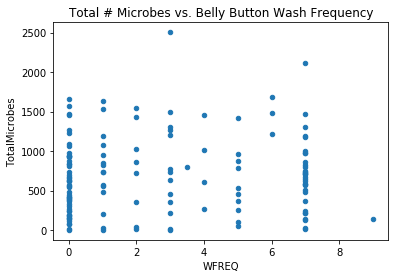

In [90]:
df_metadata.plot(x='WFREQ', y='TotalMicrobes',
                 title='Total # Microbes vs. Belly Button Wash Frequency',
                 kind='scatter');

Based on the above scatter plot, there is no correlation between belly button washing frequency and the total number of microbes.

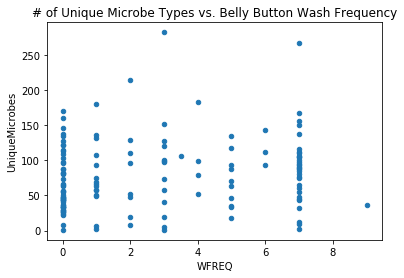

In [113]:
df_metadata.plot(x='WFREQ', y='UniqueMicrobes',
                 title='# of Unique Microbe Types vs. Belly Button Wash Frequency',
                 kind='scatter');

Based on the above scatter plot, there is no correlation between belly button washing frequency and the number of unique microbes.

#### Age vs. Microbes

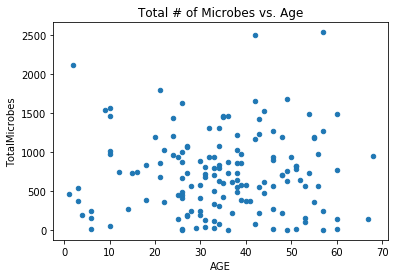

In [112]:
df_metadata.plot(x='AGE', y='TotalMicrobes',
                 title='Total # of Microbes vs. Age',
                 kind='scatter');

Based on the above scatter plot, there is no correlation between belly age and  the total number of microbes.

#### Gender vs. Microbes

In [124]:
#the gender descriptor changes lower/upper case, so make all upper
df_metadata['GENDER'] = df_metadata['GENDER'].map(lambda x: 'F' if x in ['F', 'f'] else 'M')

In [140]:
df_metadata['GENDER'].value_counts()

F    93
M    60
Name: GENDER, dtype: int64

           WFREQ  TotalMicrobes  UniqueMicrobes
GENDER                                         
F       2.970588      748.88172       85.408602
M       2.603774      668.80000       75.733333


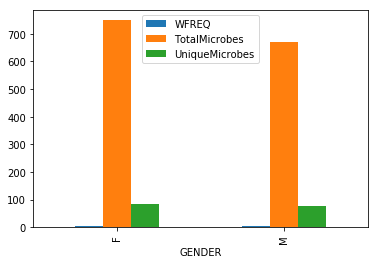

In [143]:
print(df_metadata.groupby(['GENDER']).mean()[['WFREQ', 'TotalMicrobes',
                                        'UniqueMicrobes']])
df_metadata.groupby(['GENDER']).mean()[['WFREQ', 'TotalMicrobes',
                                        'UniqueMicrobes']].plot(kind='bar');

Despite Females on average washing their belly button 14.2% more frequently, they have on average 12.0% more total microbes and 12.8% more unique microbes than Males. (would have to test signficance on this relatively small population)

        WFREQ  TotalMicrobes  UniqueMicrobes
GENDER                                      
F         2.0          699.0            82.0
M         1.0          628.5            69.5


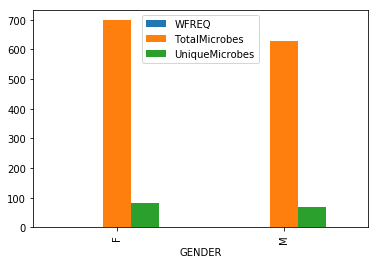

In [138]:
print(df_metadata.groupby(['GENDER']).median()[['WFREQ', 'TotalMicrobes',
                                        'UniqueMicrobes']])
df_metadata.groupby(['GENDER']).median()[['WFREQ', 'TotalMicrobes',
                                        'UniqueMicrobes']].plot(kind='bar');

This holds true as well if we look at the medians, where the median Female actually washes their belly button twice as often as the median Male, but yet they have on average 11.2% more total microbes and 18.0% more unique microbes than Males. (would have to test signficance on this relatively small population)

#### Miscelaneous Comparisons

In [144]:
df_metadata.columns

Index(['sample', 'ETHNICITY', 'GENDER', 'AGE', 'LOCATION', 'BBTYPE', 'WFREQ',
       'TotalMicrobes', 'UniqueMicrobes'],
      dtype='object')

In [170]:
#the locations come in many different forms - lets make a state column to group more
import re

df_metadata['STATE_LOCATION'] = df_metadata['LOCATION'].map(
                                    lambda x: re.split('\W+', str(x))[-1])

In [181]:
print('ETHNICITY \n', df_metadata['ETHNICITY'].value_counts(), '\n\n')
print('BB TYPE (Innie/Outie) \n', df_metadata['BBTYPE'].value_counts(), '\n\n')
print('STATE_LOCATION \n', df_metadata['STATE_LOCATION'].value_counts(), '\n\n')

ETHNICITY 
 Caucasian                130
Black                      8
Hispanic                   2
White                      1
Asian(South)               1
European                   1
Caucasian/Jewish           1
Asian(American)            1
PacificIslander            1
Caucasian/Asian            1
Caucasian/Midleastern      1
Caucasion                  1
Name: ETHNICITY, dtype: int64 


BB TYPE (Innie/Outie) 
 I          120
i           13
o            4
O            2
Both         2
Unknown      1
Name: BBTYPE, dtype: int64 


STATE_LOCATION 
 NC              94
None            27
NY               4
MA               2
UK               2
WashingtonDC     2
MT               2
GA               2
CA               2
IL               2
CT               2
DC               1
WA               1
MI               1
OK               1
FL               1
MD               1
London           1
PA               1
AB               1
VA               1
NE               1
DurhamNC         1
Name: STA

Sample sizes are so small for these different groupings, not much more to explore here. (For example, by State: NC has 94 but next highest state is NY with 4, and by Ethnicity: Caucasion has 130 but next highest is Black with 8.)

#### Microbe Categories

In [111]:
#could potentially group by microbe type to see if any correlations for certain bacterias
#but not very clean as many bacteria have multiple labels
#(could split these on ';' to aggregate more)
df_microbe_counts = df_microbes_nans.otu_label.value_counts().to_frame() #groupby(['otu_label'])
df_microbe_counts = df_microbe_counts.reset_index()
df_microbe_counts.rename(columns={'index':'MicrobeCategory',
                                  'otu_label':'count'},
                        inplace=True)
print(len(df_microbe_counts), 'Different Microbe Categories')
print(len(df_microbe_counts[df_microbe_counts['count'] >= 20]),
      'Different Microbe Categories with at least 20 different microbe IDs in that category')
df_microbe_counts.head()

332 Different Microbe Categories
36 Different Microbe Categories with at least 20 different microbe IDs in that category


,MicrobeCategory,count
0,Bacteria,513
1,Bacteria;Firmicutes;Clostridia;Clostridiales;I...,359
2,Bacteria;Actinobacteria;Actinobacteria;Actinom...,279
3,Bacteria;Firmicutes;Clostridia;Clostridiales,205
4,Bacteria;Firmicutes;Clostridia;Clostridiales;I...,133
